In [80]:
from pycocotools.coco import COCO
import os
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import random

# Define whether coco has been reloaded already
RELOAD_COCO = False

In [81]:
if RELOAD_COCO:
    # define the datatype to investigate
    data_src = 'train'
    annotation_type = 'instances'
    annotation_path = '/home/dsmith/Documents/analytics-projects/independent-learning/data/coco/raw/annotations/%s_%s2017.json' % (annotation_type, data_src)
    img_dir = '/home/dsmith/Documents/analytics-projects/independent-learning/data/coco/raw/%s2017' % data_src

    # define the annotation path and get the possible keys
    coco = COCO(annotation_path)
    img_keys = [x for x in coco.imgs.keys()]
    
    # Get the category keys in this annotation as well as the category names
    cat_ids = coco.getCatIds()
    catgs = coco.loadCats(cat_ids)
    catg_lkup = {cat['id']:cat["name"] for cat in catgs}
    print("Categories Names:")
    print(catgs_names)

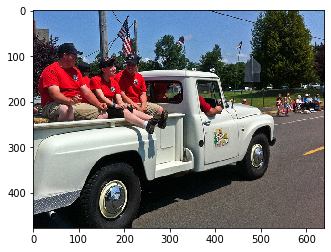

In [82]:
# define the image to view
image_id = random.choice(img_keys)
img = coco.imgs[image_id]

# Plot the image
image = np.array(Image.open(os.path.join(img_dir, img['file_name'])))
plt.imshow(image, interpolation='nearest')
plt.show()

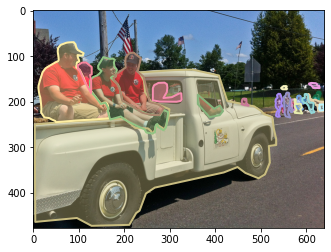

In [83]:
plt.imshow(image)
anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
anns = coco.loadAnns(anns_ids)
coco.showAnns(anns)

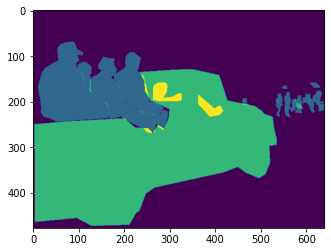

In [84]:
mask = coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += coco.annToMask(anns[i])

plt.imshow(mask)

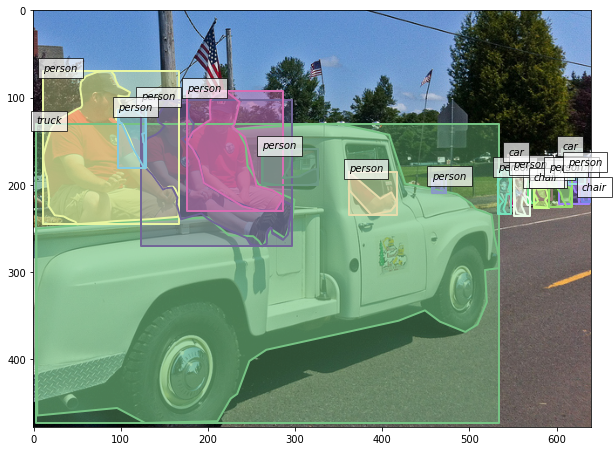

In [85]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image)

coco.showAnns(anns, draw_bbox=True)
for i, ann in enumerate(anns):
    ax.text(anns[i]['bbox'][0], anns[i]['bbox'][1], catg_lkup[anns[i]['category_id']], style='italic', 
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})